In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/tcc_ceds_music.csv')

In [3]:
data.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [4]:
data['combined_features'] = (
    data['genre'].fillna('') + ' ' +
    data['artist_name'].fillna('') + ' ' +
    data['track_name'].fillna('')
)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [9]:
def get_recommendations(song_title, data, cosine_sim, top_n=10):
    idx = data[data['track_name'] == song_title].index
    if len(idx) == 0:
        print("Song not found in the dataset.")
        return

    idx = idx[0]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:top_n+1]
    song_indices = [i[0] for i in sim_scores]

    recommendations = data.iloc[song_indices]
    return recommendations

In [10]:
recommended_songs = get_recommendations('cry', data, cosine_sim, top_n=10)
print(recommended_songs[['track_name', 'artist_name', 'genre']])

                          track_name     artist_name  genre
56                         here am i     johnnie ray    pop
12887             keep on loving you  johnnie taylor  blues
15294              too many memories  johnnie taylor  blues
14542  there's nothing i wouldn't do  johnnie taylor  blues
14679                         lately  johnnie taylor  blues
13887                     steal away  johnnie taylor  blues
14701             don't make me late  johnnie taylor  blues
12881           baby, we've got love  johnnie taylor  blues
13247  i got to love somebody's baby  johnnie taylor  blues
12882            i need lots of love  johnnie taylor  blues


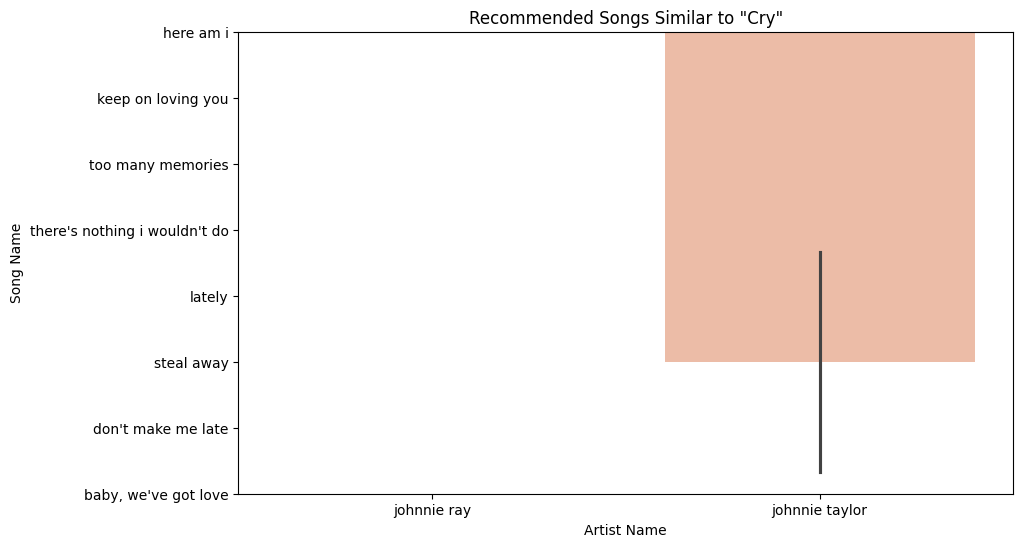

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(y='track_name', x='artist_name', data=recommended_songs ,hue=recommended_songs['artist_name'] ,palette='coolwarm')
plt.title('Recommended Songs Similar to "Cry"')
plt.xlabel('Artist Name')
plt.ylabel('Song Name')
plt.show()